In [13]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [14]:
Consumer_Key = "vk9qCD9Ia25EvbwiRHrK8kn2f"
Consumer_Secret_Key = "aQV1MaIWMLhVmVFKAoY2lQTJnZ1Oc4idFimDeUDQ2OKyglTgI6"
Access_Token = "1236192381872947200-pLZGzNZgSAZJqvk7gcmgMnHCa2DhpZ"
Access_Token_Secret = "XJvtrFU9lVVx8L1arOHaw12wvSdQxQZOcVy1GTWFhJvny"

In [15]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [16]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [17]:
posts = api.user_timeline(screen_name="LazadaID", count = 1000, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) @alxarmantojk Hai Kak, sudah direspon ya DMnya. Kita DM2an aja ya Kak.

2) @ushiwarani Hai Lazadian, jika mengalami kendala seputar Lazada, yuk langsung menghubungi melalui DM di @LazadaIDCare ya. Tim kami siap membantu. :)

3) @AndriSamsudi Hi Kak Andri, kalau ada pertanyaan atau kendala pemesanan bisa langsung ke DM Twitter Akun @LazadaIDCare yah agar dapat dibantu lebih lanjut.

4) @kenkenkarisma Hai Lazadian, aku turut menyesal atas kendalanya. Untuk pertanyaan dan permasalahan seputar Seller bisa menghubungi kami melalui layanan Live Chat di akun Seller Center ya. -Bella

5) @drzuhri Hi Lazadian, maaf yah buat kamu gak nyaman. Kalau ada pertanyaan atau kendala pemesanan di Lazada bisa langsung ke DM Twitter Akun @LazadaIDCare yah agar dapat dibantu lebih lanjut.



In [18]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"@alxarmantojk Hai Kak, sudah direspon ya DMnya..."
1,"@ushiwarani Hai Lazadian, jika mengalami kenda..."
2,"@AndriSamsudi Hi Kak Andri, kalau ada pertanya..."
3,"@kenkenkarisma Hai Lazadian, aku turut menyesa..."
4,"@drzuhri Hi Lazadian, maaf yah buat kamu gak n..."


In [19]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"Hai Kak, sudah direspon ya DMnya. Kita DM2an ..."
1,"Hai Lazadian, jika mengalami kendala seputar ..."
2,"Hi Kak Andri, kalau ada pertanyaan atau kenda..."
3,"Hai Lazadian, aku turut menyesal atas kendala..."
4,"Hi Lazadian, maaf yah buat kamu gak nyaman. K..."
...,...
195,"2 Hai Kak Aldo, boleh info detail kendalanya v..."
196,"Hai Kak Amey, DM udah di respon ya. Move via ..."
197,"Hi Kak Ridwan, demi keamanan data, move DM ya..."
198,"Hi Lazadian, maaf yah buat kamu gak nyaman. D..."


In [20]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"Hai Kak, sudah direspon ya DMnya. Kita DM2an ...",0.0,0.000000
1,"Hai Lazadian, jika mengalami kendala seputar ...",1.0,0.500000
2,"Hi Kak Andri, kalau ada pertanyaan atau kenda...",0.0,0.000000
3,"Hai Lazadian, aku turut menyesal atas kendala...",0.3,0.018182
4,"Hi Lazadian, maaf yah buat kamu gak nyaman. K...",0.0,0.000000
...,...,...,...
195,"2 Hai Kak Aldo, boleh info detail kendalanya v...",0.0,0.000000
196,"Hai Kak Amey, DM udah di respon ya. Move via ...",1.0,0.500000
197,"Hi Kak Ridwan, demi keamanan data, move DM ya...",1.0,0.500000
198,"Hi Lazadian, maaf yah buat kamu gak nyaman. D...",0.0,0.000000


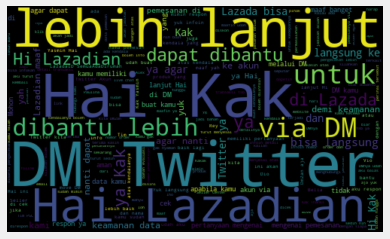

In [21]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Hai Kak, sudah direspon ya DMnya. Kita DM2an ...",0.0,0.000000,Neutral
1,"Hai Lazadian, jika mengalami kendala seputar ...",1.0,0.500000,Positive
2,"Hi Kak Andri, kalau ada pertanyaan atau kenda...",0.0,0.000000,Neutral
3,"Hai Lazadian, aku turut menyesal atas kendala...",0.3,0.018182,Positive
4,"Hi Lazadian, maaf yah buat kamu gak nyaman. K...",0.0,0.000000,Neutral
...,...,...,...,...
195,"2 Hai Kak Aldo, boleh info detail kendalanya v...",0.0,0.000000,Neutral
196,"Hai Kak Amey, DM udah di respon ya. Move via ...",1.0,0.500000,Positive
197,"Hi Kak Ridwan, demi keamanan data, move DM ya...",1.0,0.500000,Positive
198,"Hi Lazadian, maaf yah buat kamu gak nyaman. D...",0.0,0.000000,Neutral


In [23]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1)  Hai Lazadian, Dio turut sedih nih buat kendalanya :( boleh diinfoin nama pemesan dan nomer pesanannya?-Dio

2)  Hai Kak Hiro, Dio seneng ya jika kaka seneng juga :( boleh diinfoin nama pemesan dan nomer pesanannya?-Dio

3)  Hai Kak Sidik, mimin turut sedih nih buat kendalanya :( boleh diinfoin nama pemesan dan nomer pesanannya via DM yah demi Keamanan informasinya-

4) _mach Hai Kak, maaf udah buat kecewa :( pemesanan di Lazada bisa langsung ke akun  via DM Twitter ya agar nanti dapat dibantu lebih lanjut.

5)  Sorry late respon, dengan siapa mimin terhubung dan yuk infoin nomor order nya di DM Twitter kita ya.

6)  Hai Kak Hardy, maaf yah jadi bete kamunya :( huft. Oh iya Kak, keluhan kamu sudah kami respon di DM Twitter yah. Move yuk dan cek kembali DMnya, demi keamanan data Kakak.

7) _sira Hai Lazadian, maafin ya. produk disediakan oleh Seller. Maaf ya bila terlihat agak vulgar atau kurang baik dan akan jadikan evaluasi agar lebih baik lagi untuk Sell

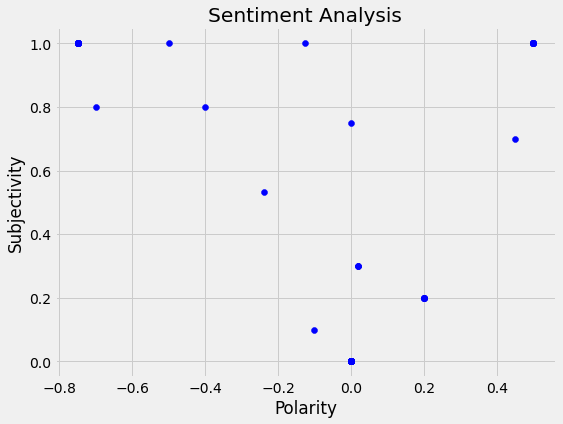

In [24]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [25]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

11.5

In [26]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

11.5

In [27]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     154
Positive     23
Negative     23
Name: Analysis, dtype: int64

In [28]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     154
Positive     23
Negative     23
Name: Analysis, dtype: int64

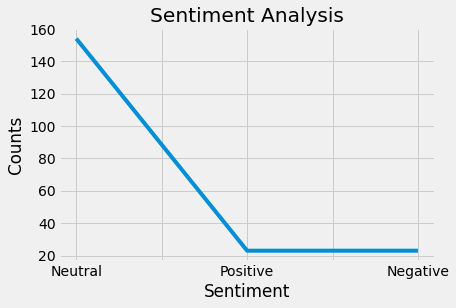

In [29]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()

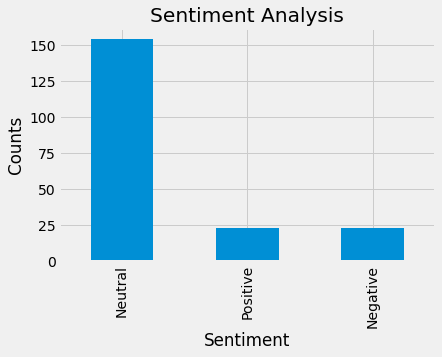

In [30]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()